In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [16]:
df = pd.read_csv('soil dataset.csv')
df

,N,P,K,ph,temperature,humidity,rainfall,label
0,90,42,43,6.502985,20.879744,82.002744,202.935536,rice
1,85,58,41,7.038096,21.770462,80.319644,226.655537,rice
2,60,55,44,7.840207,23.004459,82.320763,263.964248,rice
3,74,35,40,6.980401,26.491096,80.158363,242.864034,rice
4,78,42,42,7.628473,20.130175,81.604873,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,6.780064,26.774637,66.413269,177.774507,coffee
2196,99,15,27,6.086922,27.417112,56.636362,127.924610,coffee
2197,118,33,30,6.362608,24.131797,67.225123,173.322839,coffee
2198,117,32,34,6.758793,26.272418,52.127394,127.175293,coffee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   ph           2200 non-null   float64
 4   temperature  2200 non-null   float64
 5   humidity     2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.columns

Index(['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall', 'label'], dtype='object')

In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

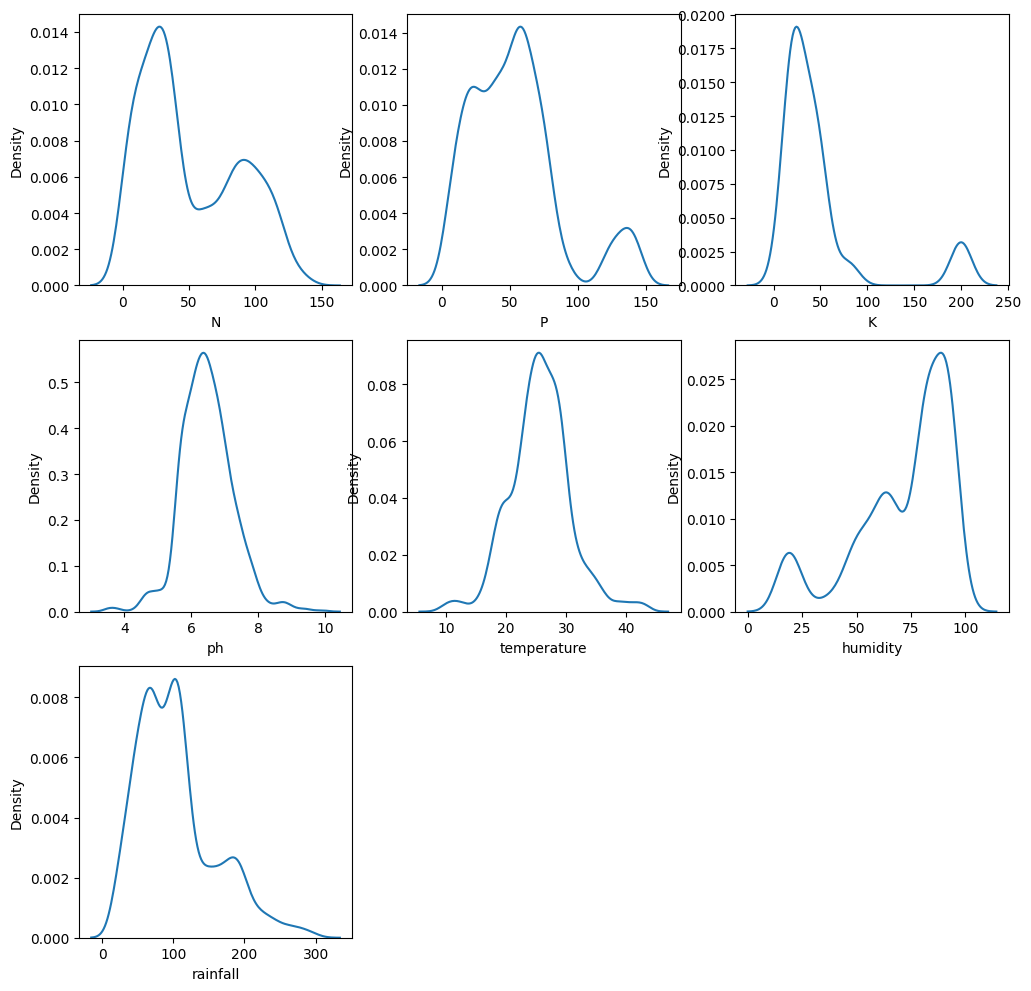

In [8]:
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:-1]:
    plt.subplot(3,3,i)
    sns.kdeplot(df[col])
    i+=1

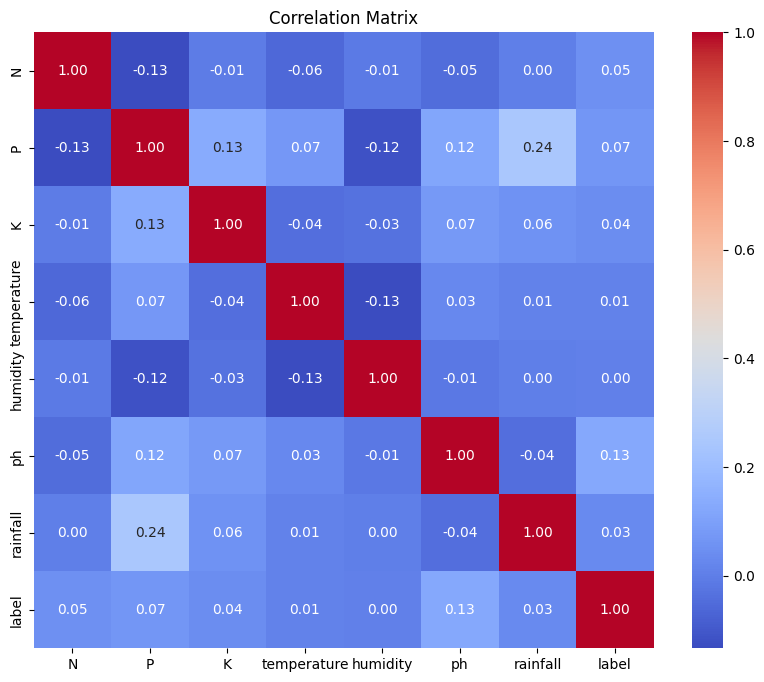

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame with the specified features and label
data = {
    'N': np.random.randn(100),
    'P': np.random.randn(100),
    'K': np.random.randn(100),
    'temperature': np.random.randn(100),
    'humidity': np.random.randn(100),
    'ph': np.random.randn(100),
    'rainfall': np.random.randn(100),
    'label': np.random.randint(2, size=100)  # Example binary label (0 or 1)
}
df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [10]:
import scipy.stats as sm

In [11]:
df.iloc[:,:-1].skew()

N              0.194383
P              0.112965
K             -0.193735
temperature    0.175798
humidity       0.243259
ph            -0.111654
rainfall       0.102597
dtype: float64

In [17]:
df

,N,P,K,ph,temperature,humidity,rainfall,label
0,90,42,43,6.502985,20.879744,82.002744,202.935536,rice
1,85,58,41,7.038096,21.770462,80.319644,226.655537,rice
2,60,55,44,7.840207,23.004459,82.320763,263.964248,rice
3,74,35,40,6.980401,26.491096,80.158363,242.864034,rice
4,78,42,42,7.628473,20.130175,81.604873,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,6.780064,26.774637,66.413269,177.774507,coffee
2196,99,15,27,6.086922,27.417112,56.636362,127.924610,coffee
2197,118,33,30,6.362608,24.131797,67.225123,173.322839,coffee
2198,117,32,34,6.758793,26.272418,52.127394,127.175293,coffee


In [18]:
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label']) + 1

# Save the mapping of encoded values to original labels
label_mapping = dict(zip(df['encoded_label'], le.inverse_transform(df['encoded_label'] - 1)))

In [19]:
df['encoded_label']

0       21
1       21
2       21
3       21
4       21
        ..
2195     6
2196     6
2197     6
2198     6
2199     6
Name: encoded_label, Length: 2200, dtype: int64

In [20]:
class_labels = le.classes_
class_labels

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [21]:
df

,N,P,K,ph,temperature,humidity,rainfall,label,encoded_label
0,90,42,43,6.502985,20.879744,82.002744,202.935536,rice,21
1,85,58,41,7.038096,21.770462,80.319644,226.655537,rice,21
2,60,55,44,7.840207,23.004459,82.320763,263.964248,rice,21
3,74,35,40,6.980401,26.491096,80.158363,242.864034,rice,21
4,78,42,42,7.628473,20.130175,81.604873,262.717340,rice,21
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,6.780064,26.774637,66.413269,177.774507,coffee,6
2196,99,15,27,6.086922,27.417112,56.636362,127.924610,coffee,6
2197,118,33,30,6.362608,24.131797,67.225123,173.322839,coffee,6
2198,117,32,34,6.758793,26.272418,52.127394,127.175293,coffee,6


In [22]:
x = df.drop(['label','encoded_label'],axis=1)
y = df['encoded_label']

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Step 2: Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Step 3: Normalize the 'ph' column
df['ph'] = scaler.fit_transform(df[['ph']])

# Step 4: Save the DataFrame back to a CSV file (if needed)
df.to_csv('your_normalized_dataset.csv', index=False)

print(df.head())  # Optional: To check the first few rows of the DataFrame


    N   P   K        ph  temperature   humidity    rainfall label  \
0  90  42  43  0.466264    20.879744  82.002744  202.935536  rice   
1  85  58  41  0.549480    21.770462  80.319644  226.655537  rice   
2  60  55  44  0.674219    23.004459  82.320763  263.964248  rice   
3  74  35  40  0.540508    26.491096  80.158363  242.864034  rice   
4  78  42  42  0.641291    20.130175  81.604873  262.717340  rice   

   encoded_label  
0             21  
1             21  
2             21  
3             21  
4             21  


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1980, 7)
(220, 7)
(1980,)
(220,)


In [25]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
y_pred = rf_model.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

In [27]:
rf = RandomForestClassifier()
param_grid = {'n_estimators':np.arange(50,200),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(4,100),
    'min_samples_split':np.arange(4,100),
    'min_samples_leaf':np.arange(4,100)}

rscv_model = RandomizedSearchCV(rf,param_grid, cv=5)
rscv_model.fit(x_train,y_train)
rscv_model.best_estimator_

RandomForestClassifier(max_depth=np.int64(15), min_samples_leaf=np.int64(18),
                       min_samples_split=np.int64(21),
                       n_estimators=np.int64(73))

In [29]:
new_rf_model = rscv_model.best_estimator_

y_pred = new_rf_model.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

In [30]:
y_pred_train = new_rf_model.predict(x_train)

print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred_train))
print()
print("Classification Report:\n",classification_report(y_train,y_pred_train))

Confusion Matrix:
 [[91  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 88  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 95  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 96  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 91  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 92  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 91  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 86  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 84  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 88  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 88  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 86  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 89  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 87  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

In [31]:
y_test.values[:10]

array([ 5, 20, 13,  2,  9,  8, 14,  8, 16,  2])

In [32]:
y_pred[:10]

array([ 5, 20, 13,  2,  9,  8, 14,  8, 16,  2])

In [33]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_prediction=rfc.predict(x_test)
accuracy_score=(y_test,y_prediction)
accuracy_score

(1897     5
 933     20
 1121    13
 1052     2
 2021     9
         ..
 411     19
 2053     9
 72      21
 991     20
 125     12
 Name: encoded_label, Length: 220, dtype: int64,
 array([ 5, 20, 13,  2,  9,  8, 14,  8, 16,  2,  4, 16, 18,  9, 11, 17, 22,
        20, 14, 10, 11, 17,  8, 18, 11, 17, 19,  8, 20, 17, 19,  2, 20, 22,
         1, 12, 17, 16, 17,  3, 18,  5,  8,  7, 18, 14,  2, 11,  7,  8, 18,
        13, 17, 15,  9, 11, 10,  7,  4, 11, 18,  1, 13, 17,  2, 18,  6, 17,
        13, 11, 20, 10, 12, 20,  8, 17, 13,  3, 10,  1, 12, 12, 11, 10,  2,
        16, 19,  2, 22, 10,  7,  8,  8, 21,  8,  3, 19, 15, 12, 17, 21,  9,
        15, 15,  3,  7,  7,  1,  5, 14,  2,  6,  5,  6, 22, 22,  2,  5, 18,
        18, 21, 12,  9,  9, 13, 12, 18,  7, 10, 13, 20,  2,  9, 12, 13, 14,
        16,  8, 10, 13, 10,  6, 18, 15, 12, 17,  9, 11, 20, 15,  8, 21,  5,
        19, 12, 17,  4,  1, 19, 21,  2,  9,  6,  9,  5,  9, 10, 21,  8, 13,
         1, 18,  2, 14, 16, 16, 17, 22, 21,  4, 16,  1, 12,

In [34]:
import json
import pickle
import os

In [35]:
class_labels

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [36]:
label_dict = {}
for index, label in enumerate(class_labels):
    label_dict[label] = index

In [37]:
features_data = {'columns': list(x.columns)}

In [38]:
with open('features_data.json', 'w') as file:
    json.dump(features_data, file)

In [39]:
with open('new_rf_model.pickle', 'wb') as file:
    pickle.dump(new_rf_model, file)

In [40]:
num_test_series = 5 # Change this to the desired number of test series

In [41]:
for i in range(num_test_series):
    # Create a test series with zeros
    test_series = pd.Series(np.zeros(len(features_data['columns'])), index=features_data['columns'])

In [42]:
test_series['N'] = 65
test_series['P'] = 37
test_series['K'] = 40
test_series['temperature'] = 23.3
test_series['humidity'] = 71.5
test_series['ph'] = 6.9
test_series['rainfall'] = 102.2

In [43]:
test_series

N               65.0
P               37.0
K               40.0
ph               6.9
temperature     23.3
humidity        71.5
rainfall       102.2
dtype: float64

In [45]:
# Predict probabilities for each class
probabilities = new_rf_model.predict_proba([test_series])[0]

# Create a dictionary to store crop probabilities
crop_probabilities = {}

# Associate each crop label with its probability
for crop_label, probability in zip(class_labels, probabilities):
    crop_probabilities[crop_label] = probability
sorted_crops = sorted(crop_probabilities.items(), key=lambda x: x[1], reverse=True)
threshold = 0.15
recommended_crops = [crop for crop, prob in sorted_crops if prob >= threshold]

print("Recommended Crops:")
for crop in recommended_crops:
    print(crop)


Recommended Crops:
jute
maize


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
pickle.dump(rfc,open('model.pkl','wb'))